In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#载入原图，并转为灰度图像
img_original=cv2.imread('/home/sjtu/scratch/tongzhao/mmdetection/demo/demo.jpg')
img_gray=cv2.cvtColor(img_original,cv2.COLOR_BGR2GRAY)

In [4]:
#求二值图像
_, thresh=cv2.threshold(img_gray,125,256,1) # thresh二值图像

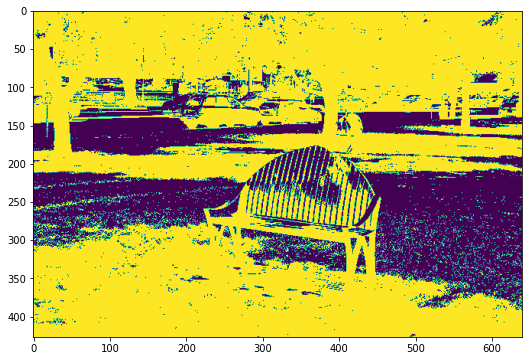

In [5]:
plt.figure(figsize=(10,6))
plt.imshow(thresh)

In [6]:
#寻找轮廓
contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [7]:
#绘制轮廓
cv2.drawContours(img_original,contours,-1,(0,0,255),3,lineType=cv2.LINE_AA)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

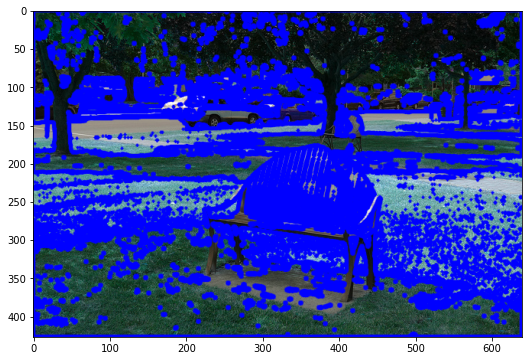

In [8]:
plt.figure(figsize=(10,6))
plt.imshow(img_original)

In [9]:
# #显示图像
# cv2.imshow('Contours',img_original)
# cv2.waitKey()
# cv2.destroyAllWindows()

使用pycocotools画contour

In [10]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import random
 
 
#1、定义数据集路径
cocoRoot = "/home/sjtu/scratch/tongzhao/e2ec/data/coco"
dataType = "val2017"
annFile = os.path.join(cocoRoot, f'annotations/instances_{dataType}.json')
print(f'Annotation file: {annFile}')
 
#2、为实例注释初始化COCO的API
coco=COCO(annFile)
 
 
#3、采用不同函数获取对应数据或类别
ids = coco.getCatIds('person')[0]    #采用getCatIds函数获取"person"类别对应的ID
print(f'"person" 对应的序号: {ids}') 
id = coco.getCatIds(['dog'])[0]      #获取某一类的所有图片，比如获取包含dog的所有图片
imgIds = coco.catToImgs[id]
print(f'包含dog的图片共有：{len(imgIds)}张, 分别是：',imgIds)
 
 
cats = coco.loadCats(1)               #采用loadCats函数获取序号对应的类别名称
print(f'"1" 对应的类别名称: {cats}')
 
imgIds = coco.getImgIds(catIds=[1])    #采用getImgIds函数获取满足特定条件的图片（交集），获取包含person的所有图片
print(f'包含person的图片共有：{len(imgIds)}张')
 

#4、将图片进行可视化
imgId = imgIds[10]
imgInfo = coco.loadImgs(imgId)[0]
print(f'图像{imgId}的信息如下：\n{imgInfo}')

Annotation file: /home/sjtu/scratch/tongzhao/e2ec/data/coco/annotations/instances_val2017.json
loading annotations into memory...
Done (t=0.45s)
creating index...
index created!
"person" 对应的序号: 1
包含dog的图片共有：218张, 分别是： [289343, 61471, 472375, 520301, 579321, 494869, 554002, 78823, 419974, 404484, 329219, 68078, 170893, 65485, 498286, 424162, 61108, 67213, 365207, 131273, 279278, 7386, 139099, 554291, 482917, 88951, 60835, 261161, 129756, 267300, 169076, 546829, 209613, 224200, 205834, 432553, 225184, 372819, 452891, 76417, 366884, 291664, 29393, 377575, 129756, 209613, 432553, 372819, 366884, 209613, 372819, 372819, 78565, 171611, 489014, 193162, 361571, 532575, 190140, 79229, 407083, 415990, 219578, 161609, 311190, 241326, 474164, 117525, 189806, 246454, 286422, 235399, 236166, 126110, 140203, 392818, 53529, 288685, 305343, 193162, 246454, 375278, 532530, 251572, 81766, 401991, 49269, 206831, 139872, 412240, 22192, 71226, 505573, 237864, 292330, 534270, 222317, 318908, 347930, 89880, 8

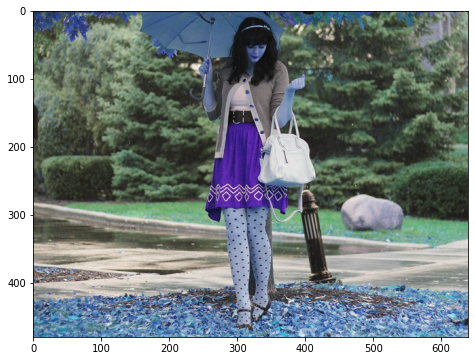

In [11]:
imPath = os.path.join(cocoRoot, dataType, imgInfo['file_name'])                     
im = cv2.imread(imPath)
plt.figure(figsize=(10,6))
plt.imshow(im)

In [12]:
annIds = coco.getAnnIds(imgIds=imgInfo['id'])      # 获取该图像对应的anns的Id
print(f'图像{imgInfo["id"]}包含{len(annIds)}个ann对象，分别是:\n{annIds}')
anns = coco.loadAnns(annIds)

图像401446包含3个ann对象，分别是:
[280170, 444102, 1172714]


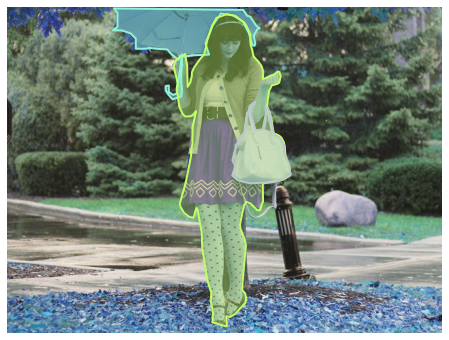

In [13]:
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.axis('off')
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [14]:
# print(f'ann{annIds[2]}对应的mask如下：')
mask = coco.annToMask(anns[2])

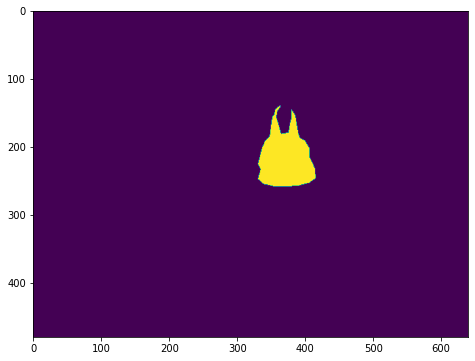

In [15]:
plt.figure(figsize=(10,6))
plt.imshow(mask)

In [16]:
#寻找轮廓
contours,hierarchy=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [17]:
#绘制轮廓
cv2.drawContours(im,contours,-1,(0,0,255),3,lineType=cv2.LINE_AA)

array([[[ 44,  66, 101],
        [ 42,  63, 101],
        [ 43,  64, 102],
        ...,
        [ 88, 118, 143],
        [ 91, 127, 143],
        [ 90, 132, 144]],

       [[ 40,  61,  92],
        [ 41,  61,  96],
        [ 50,  69, 106],
        ...,
        [ 97, 128, 143],
        [ 97, 133, 149],
        [ 88, 129, 144]],

       [[ 43,  65,  90],
        [ 48,  69, 100],
        [ 40,  60,  95],
        ...,
        [118, 154, 154],
        [ 99, 134, 148],
        [ 89, 126, 148]],

       ...,

       [[ 78, 144, 195],
        [ 72, 138, 189],
        [ 54, 120, 171],
        ...,
        [140, 171, 204],
        [154, 185, 216],
        [149, 181, 210]],

       [[ 80, 128, 180],
        [ 84, 134, 186],
        [ 89, 139, 191],
        ...,
        [140, 184, 208],
        [142, 187, 208],
        [136, 182, 200]],

       [[ 69, 103, 156],
        [ 94, 131, 183],
        [ 96, 135, 187],
        ...,
        [135, 188, 208],
        [142, 197, 212],
        [141, 200, 210]]

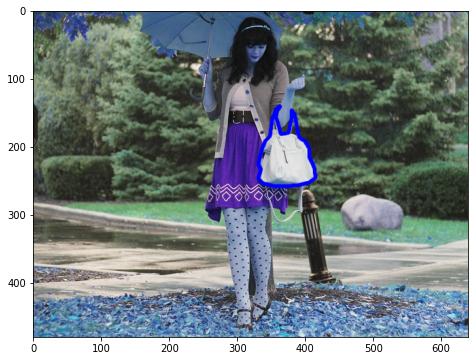

In [18]:
plt.figure(figsize=(10,6))
plt.imshow(im)

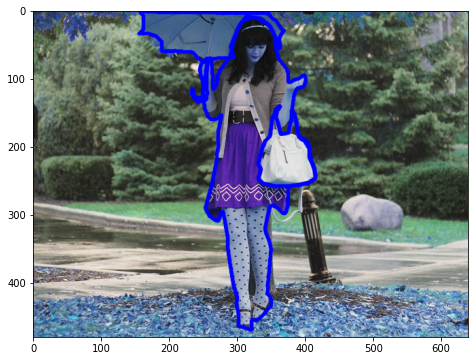

In [19]:
annIds = coco.getAnnIds(imgIds=imgInfo['id'])      # 获取该图像对应的anns的Id
print(f'图像{imgInfo["id"]}包含{len(annIds)}个ann对象，分别是:\n{annIds}')
anns = coco.loadAnns(annIds)
for ann in anns:
    mask = coco.annToMask(ann)
    contours,hierarchy=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(im,contours,-1,(0,0,255),3,lineType=cv2.LINE_AA)
plt.figure(figsize=(10,6))
plt.imshow(im)